In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

spotify = pd.read_csv("D:\downloads\Data\spotify_data.csv")
spotify_df = pd.DataFrame(spotify)
spotify_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [2]:
print(spotify_df.dtypes)

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object


In [3]:
Na_df = spotify_df.isnull().sum()
print(Na_df)

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64


In [4]:
#100 for popularity is the highest it gets
spotify_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


C:\Users\leoju\AppData\Local\Temp\ipykernel_6492\1444965464.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


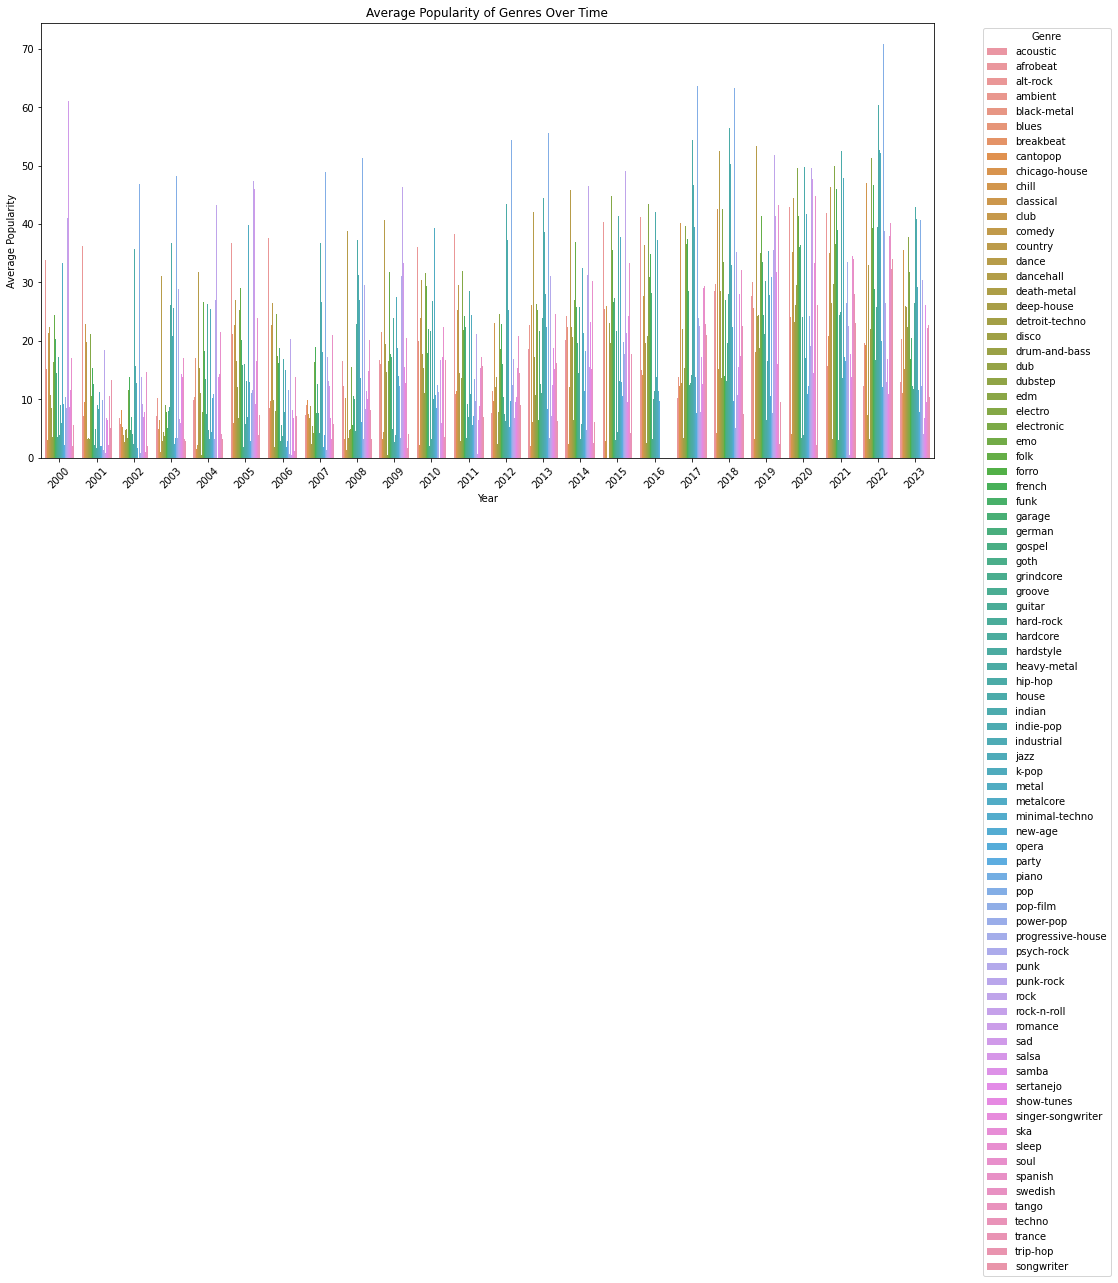

In [5]:
#Exploratory analysis
#Genre popularity over time
genre_popularity = spotify_df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='year', y='popularity', hue='genre', data=genre_popularity, ci=None)
plt.title('Average Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

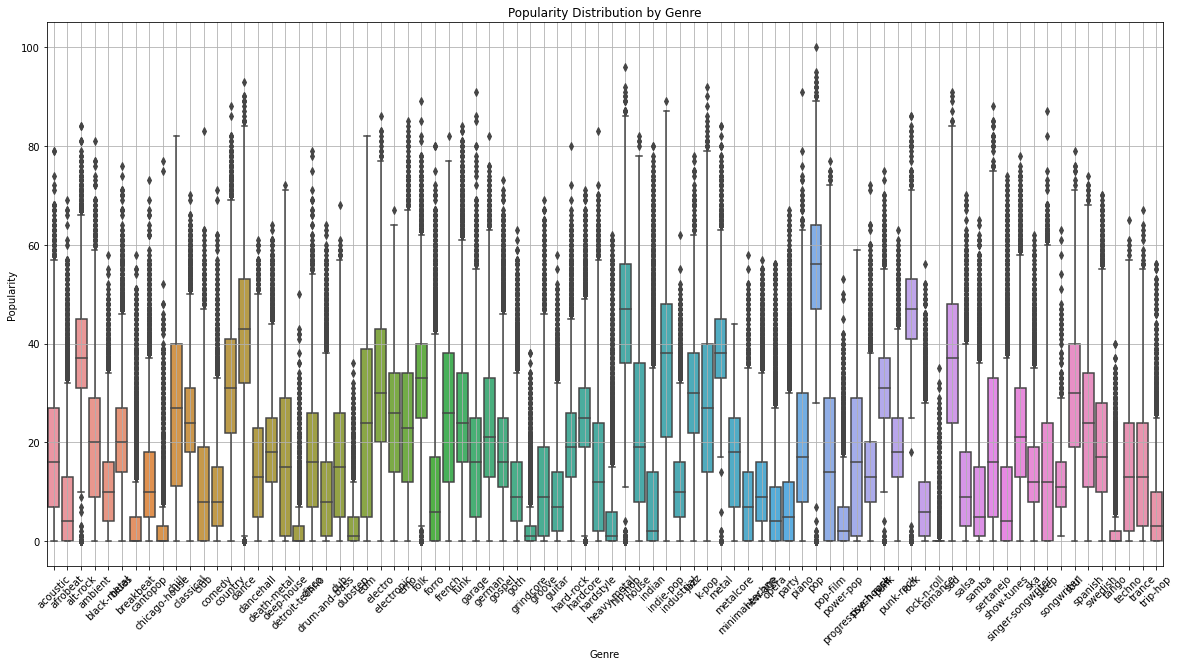

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='popularity', data=spotify_df)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
#These were the past top 10 genres
#Time wise, pop genre has been having the most popular songs over the years. 
#pop, hip-hop, and rock are the 3 most popular genres
genre_popularity = spotify_df.groupby(['genre'])['popularity'].mean().reset_index()
genre_popularity.sort_values(by='popularity', ascending=False).head(10)

,genre,popularity
56,pop,55.685806
42,hip-hop,46.315736
63,rock,46.228985
14,dance,43.034337
49,metal,39.698860
2,alt-rock,38.596807
66,sad,36.122248
45,indie-pop,35.518260
27,folk,33.448547
13,country,33.047419


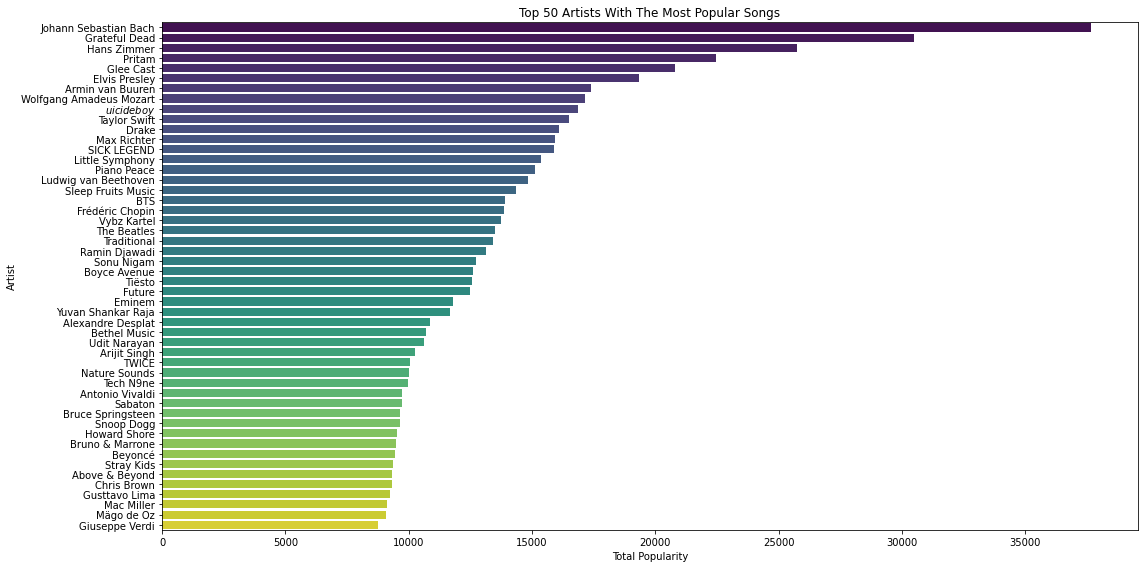

In [8]:
#take a look at the top 50 artists who has the most populararity index sum
artist_popularity = spotify_df.groupby('artist_name')['popularity'].sum().reset_index()

#Descending order 
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False).head(50)

plt.figure(figsize=(16, 8))
sns.barplot(x='popularity', y='artist_name', data=artist_popularity, palette='viridis')
plt.title('Top 50 Artists With The Most Popular Songs')
plt.xlabel('Total Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

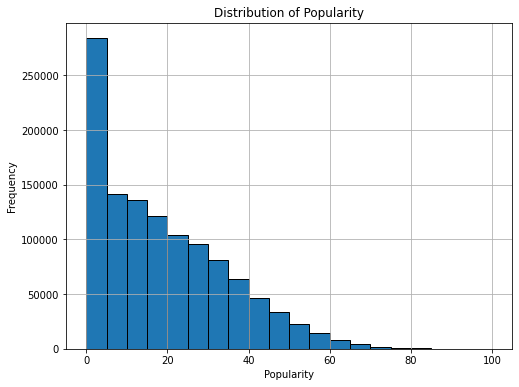

In [9]:
# Plotting a histogram of 'popularity'
#The histogram shows that most songs rarely break 40 and most are within 0-20.
plt.figure(figsize=(8, 6))
plt.hist(spotify_df['popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

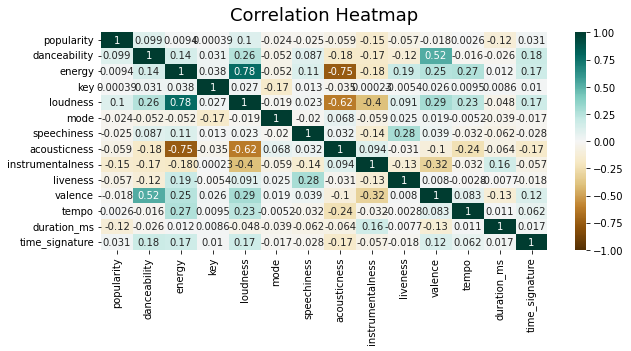

In [10]:
#Creating a corr matrix heatmap
#The features given are not highly corr with the popularity
features = ['popularity', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
spotify_df_features = spotify_df[features]

plt.figure(figsize = (10, 4))
heatmap = sns.heatmap(spotify_df_features.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [11]:
#from the data and an article, https://medium.com/protonradio/introducing-spotify-popularity-scores-know-which-artists-can-help-you-grow-879cbf78fb98#:~:text=OFFICIAL%20PLAYLISTS%3A%20Artists%20with%20a,their%20mixes%20by%20over%2010%25, it mentions that 40 to 50 would be a good cut off for what gets featured.
#using this info I will use 40 to determine that a song is popular
popularity_threshold = 40

spotify_df['popularity_cat'] = spotify_df['popularity'].apply(lambda x: 1 if x >= popularity_threshold else 0)


In [12]:
spotify_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_cat
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,...,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,1
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,1
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,...,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,1
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,...,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,1
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,1


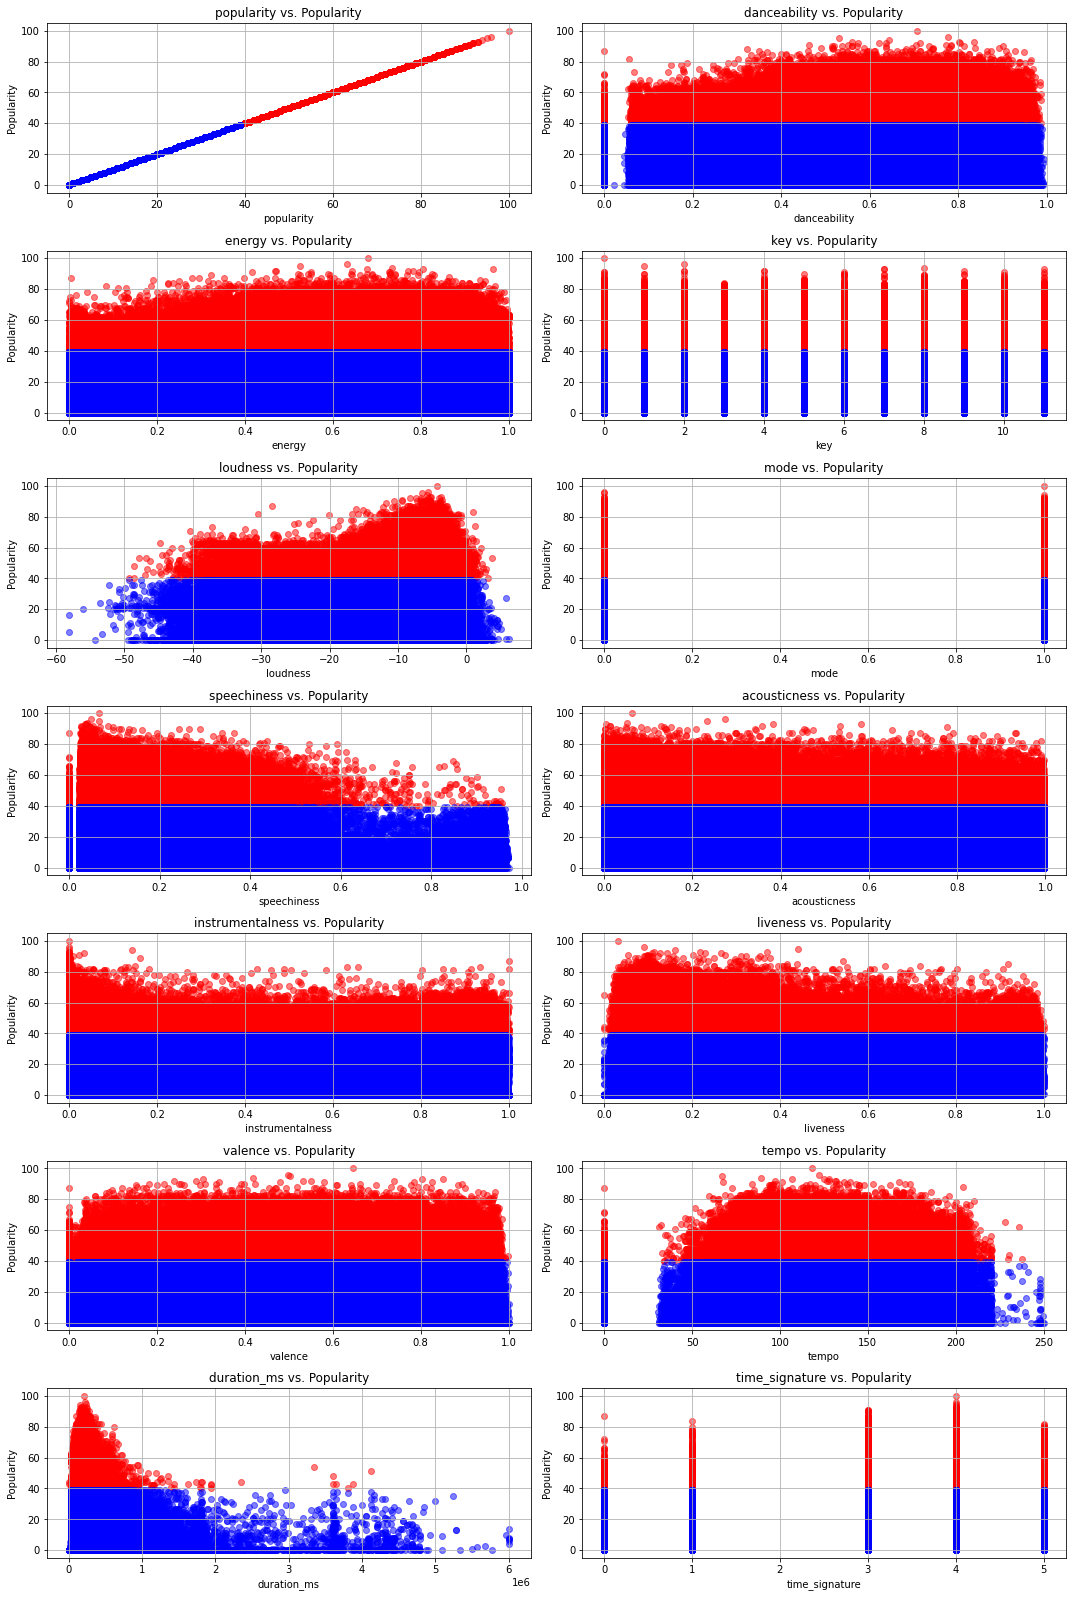

In [13]:
plt.figure(figsize=(15, 25))
for i, feature in enumerate(features, start=1):
    plt.subplot(len(features) // 2 + 1, 2, i)
    plt.scatter(spotify_df[feature][spotify_df['popularity_cat'] == 1], 
                spotify_df['popularity'][spotify_df['popularity_cat'] == 1],
                color='red', alpha=0.5, label='Popular')
    plt.scatter(spotify_df[feature][spotify_df['popularity_cat'] == 0], 
                spotify_df['popularity'][spotify_df['popularity_cat'] == 0], 
                color='blue', alpha=0.5, label='Not Popular')
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
#I need to one hot encode the variables so that the alogrithm can understand and process the qualitative data
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [15]:
spotify_df = onehot_encode(spotify_df, 'genre', 'g')

In [16]:
print(spotify_df.columns)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'danceability', 'energy', 'key', 'loudness',
       ...
       'g_ska', 'g_sleep', 'g_songwriter', 'g_soul', 'g_spanish', 'g_swedish',
       'g_tango', 'g_techno', 'g_trance', 'g_trip-hop'],
      dtype='object', length=102)


In [17]:
spotify_df

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,danceability,energy,key,loudness,...,g_ska,g_sleep,g_songwriter,g_soul,g_spanish,g_swedish,g_tango,g_techno,g_trance,g_trip-hop
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,0.483,0.303,4,-10.058,...,0,0,0,0,0,0,0,0,0,0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,0.572,0.454,3,-10.286,...,0,0,0,0,0,0,0,0,0,0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,0.409,0.234,3,-13.711,...,0,0,0,0,0,0,0,0,0,0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,0.392,0.251,10,-9.845,...,0,0,0,0,0,0,0,0,0,0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,0.430,0.791,6,-5.419,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,0.373,0.742,10,-6.453,...,0,0,0,0,0,0,0,0,0,1
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,0.516,0.675,7,-7.588,...,0,0,0,0,0,0,0,0,0,1
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,0.491,0.440,5,-8.512,...,0,0,0,0,0,0,0,0,0,1
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,0.480,0.405,0,-13.343,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#I will use a random forest to predict popularity as I have non linear relationships and I am using a wide variety of features.
X = spotify_df.drop(['popularity_cat', 'artist_name', 'Unnamed: 0', 'track_name', 'track_id', 'popularity', 'year'], axis=1)
y = spotify_df['popularity']

sample_size = 200
X_sample = X.iloc[:sample_size]
y_sample = y.iloc[:sample_size]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


In [29]:
RFR = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

In [30]:
RFR.fit(X_train, y_train)

KeyboardInterrupt: 